# Nasa Turbofan Engine Remaining Lifetime

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import xgboost as xgb
import lightgbm as lgbm
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score,roc_auc_score,precision_score,recall_score,f1_score
from sklearn.model_selection import KFold,GridSearchCV,RandomizedSearchCV

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wE73wKeYGve5UTReY_U4M2UmGJZkGHbBVDtUy-ipKIdytN2_teEkAs
Mounted at /content/gdrive


# Read data and understanding data

In [ ]:
columns=["id","cycle","op1","op2","op3","sensor1","sensor2","sensor3","sensor4","sensor5","sensor6","sensor7","sensor8",
         "sensor9","sensor10","sensor11","sensor12","sensor13","sensor14","sensor15","sensor16","sensor17","sensor18","sensor19"
         ,"sensor20","sensor21","sensor22","sensor23"]

In [ ]:
train=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/input/train_FD001.txt",sep=" ",names=columns)
test=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/input/test_FD001.txt",sep=" ",names=columns)
test_results=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/input/RUL_FD001.txt",sep=" ",header=None)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        20631 non-null  int64  
 1   cycle     20631 non-null  int64  
 2   op1       20631 non-null  float64
 3   op2       20631 non-null  float64
 4   op3       20631 non-null  float64
 5   sensor1   20631 non-null  float64
 6   sensor2   20631 non-null  float64
 7   sensor3   20631 non-null  float64
 8   sensor4   20631 non-null  float64
 9   sensor5   20631 non-null  float64
 10  sensor6   20631 non-null  float64
 11  sensor7   20631 non-null  float64
 12  sensor8   20631 non-null  float64
 13  sensor9   20631 non-null  float64
 14  sensor10  20631 non-null  float64
 15  sensor11  20631 non-null  float64
 16  sensor12  20631 non-null  float64
 17  sensor13  20631 non-null  float64
 18  sensor14  20631 non-null  float64
 19  sensor15  20631 non-null  float64
 20  sensor16  20631 non-null  fl

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        13096 non-null  int64  
 1   cycle     13096 non-null  int64  
 2   op1       13096 non-null  float64
 3   op2       13096 non-null  float64
 4   op3       13096 non-null  float64
 5   sensor1   13096 non-null  float64
 6   sensor2   13096 non-null  float64
 7   sensor3   13096 non-null  float64
 8   sensor4   13096 non-null  float64
 9   sensor5   13096 non-null  float64
 10  sensor6   13096 non-null  float64
 11  sensor7   13096 non-null  float64
 12  sensor8   13096 non-null  float64
 13  sensor9   13096 non-null  float64
 14  sensor10  13096 non-null  float64
 15  sensor11  13096 non-null  float64
 16  sensor12  13096 non-null  float64
 17  sensor13  13096 non-null  float64
 18  sensor14  13096 non-null  float64
 19  sensor15  13096 non-null  float64
 20  sensor16  13096 non-null  fl

In [ ]:
train.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [ ]:
print('Unique ID: ',train.id.unique())

Unique ID:  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]


# Engine cycle lifetime

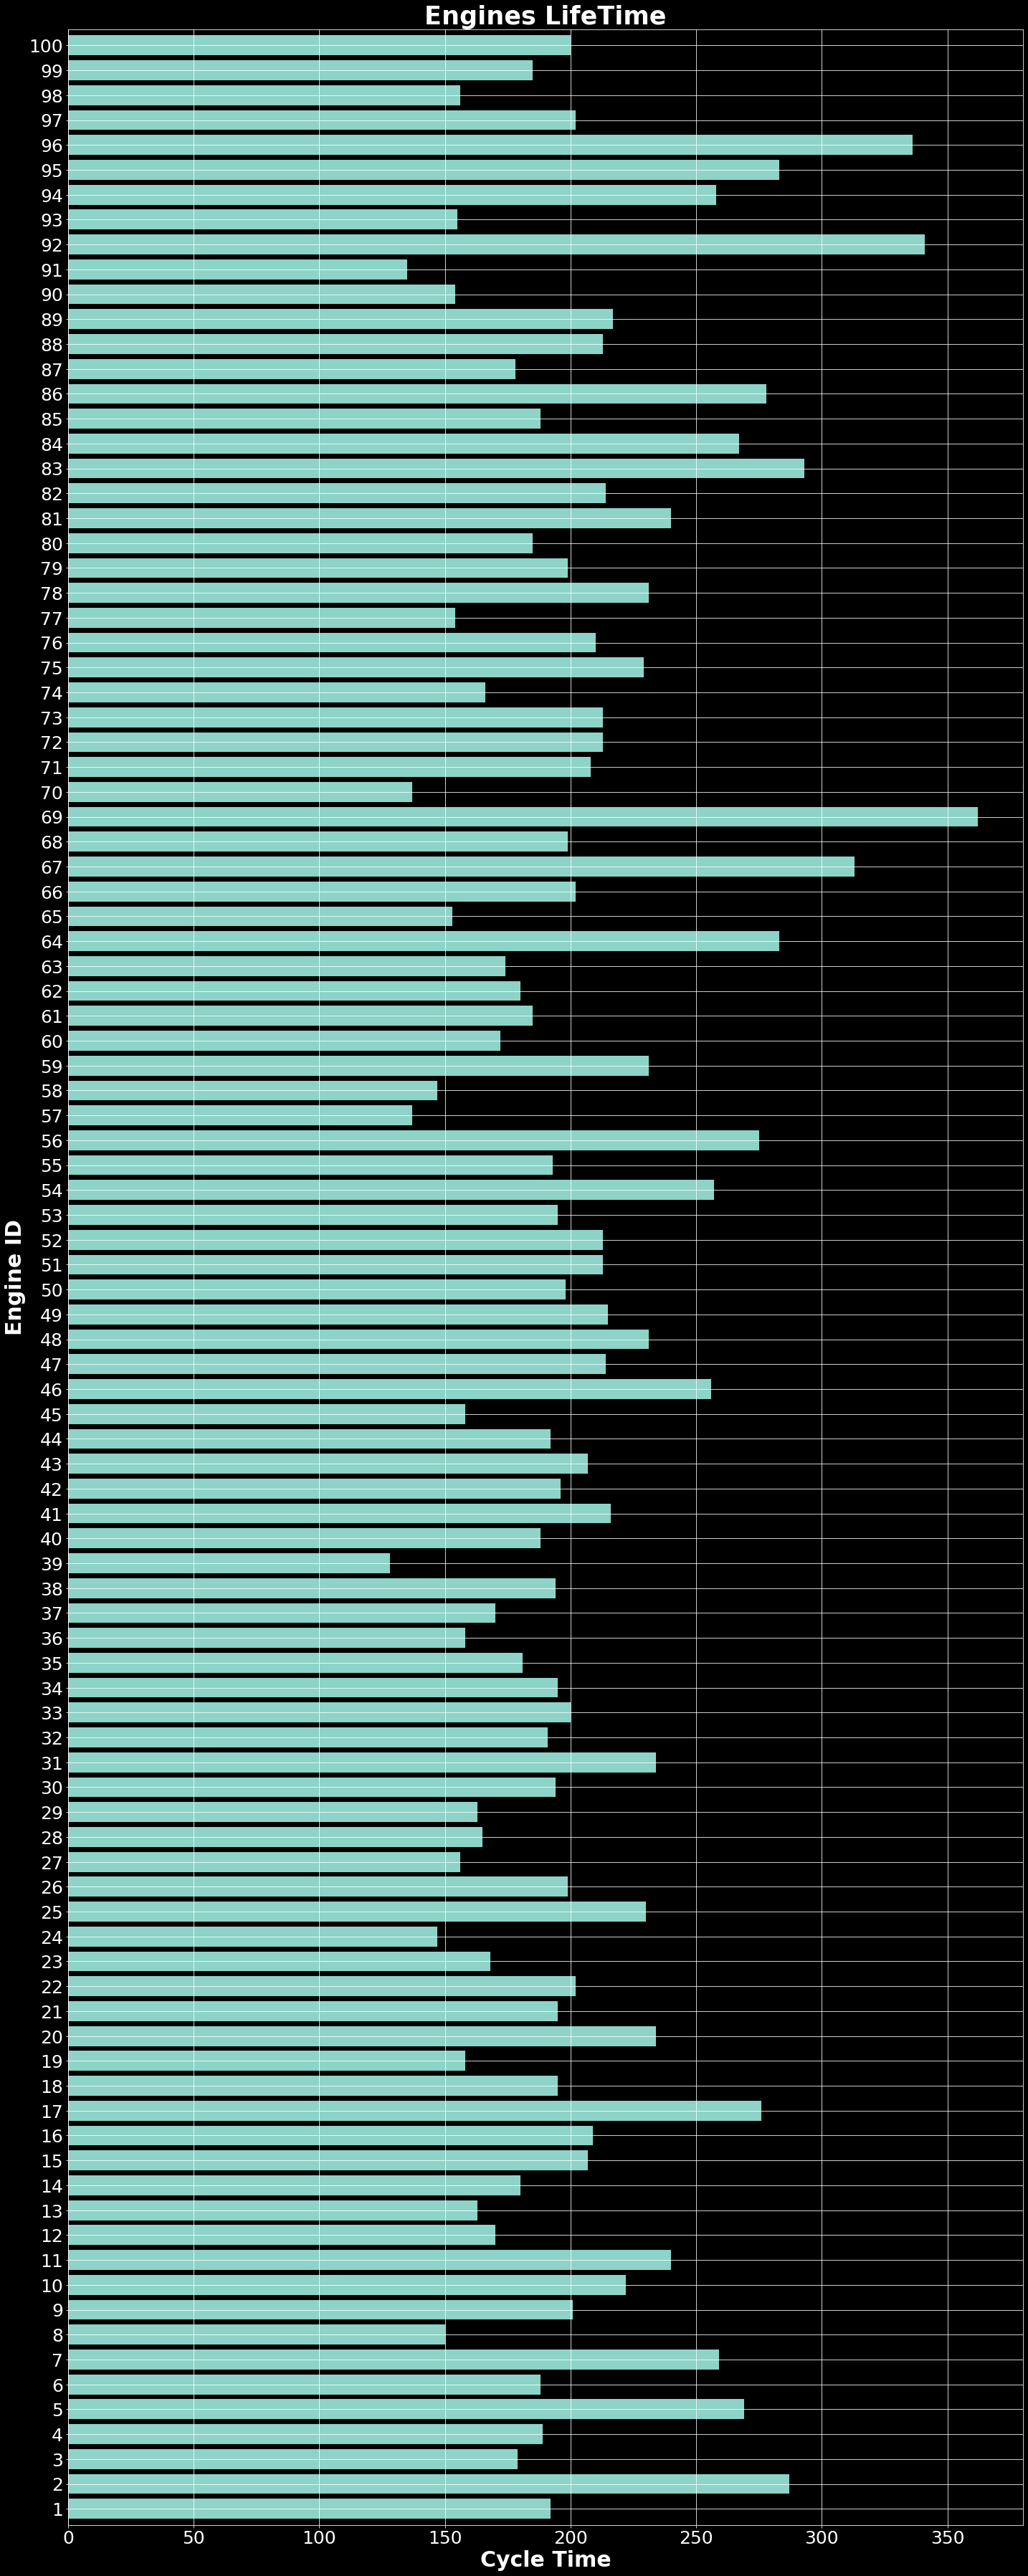

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(20,50))
ax=train.groupby('id')['cycle'].max().plot(kind='barh',width=0.8, stacked=True,align='center',rot=0)
plt.title('Engines LifeTime',fontweight='bold',size=35)
plt.xlabel('Cycle Time',fontweight='bold',size=30)
plt.xticks(size=25)
plt.ylabel('Engine ID',fontweight='bold',size=30)
plt.yticks(size=25)
plt.grid(True)
plt.tight_layout(True)
plt.show()

In [ ]:
test_results.columns=["rul","null"]
print(test_results.shape)
test_results.head()


(100, 2)


,rul,null
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN


In [ ]:
test_results.drop(["null"],axis=1,inplace=True)
test_results['id']=test_results.index+1
test_results.head()

,rul,id
0,112,1
1,98,2
2,69,3
3,82,4
4,91,5


In [ ]:
rul = pd.DataFrame(test.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']

In [ ]:
rul.head()

,id,max
0,1,31
1,2,49
2,3,126
3,4,106
4,5,98


In [ ]:
test_results['rul_failed']=test_results['rul']+rul['max']
test_results.head()

,rul,id,rul_failed
0,112,1,143
1,98,2,147
2,69,3,195
3,82,4,188
4,91,5,189


In [ ]:
test_results.drop(["rul"],axis=1,inplace=True)

In [ ]:
test=test.merge(test_results,on=['id'],how='left')

In [ ]:
test["remaining_cycle"]=test["rul_failed"]-test["cycle"]
test.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23,rul_failed,remaining_cycle
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN,143,142
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN,143,141
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN,143,140
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN,143,139
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN,143,138


In [ ]:
test.isnull().sum()

id                     0
cycle                  0
op1                    0
op2                    0
op3                    0
sensor1                0
sensor2                0
sensor3                0
sensor4                0
sensor5                0
sensor6                0
sensor7                0
sensor8                0
sensor9                0
sensor10               0
sensor11               0
sensor12               0
sensor13               0
sensor14               0
sensor15               0
sensor16               0
sensor17               0
sensor18               0
sensor19               0
sensor20               0
sensor21               0
sensor22           13096
sensor23           13096
rul_failed             0
remaining_cycle        0
dtype: int64

In [ ]:
df_train=train.drop(["sensor22","sensor23"],axis=1)
df_test=test.drop(["sensor22","sensor23"],axis=1)

In [ ]:
df_test.drop(["rul_failed"],axis=1,inplace=True)
df_test.columns

Index(['id', 'cycle', 'op1', 'op2', 'op3', 'sensor1', 'sensor2', 'sensor3',
       'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9',
       'sensor10', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15',
       'sensor16', 'sensor17', 'sensor18', 'sensor19', 'sensor20', 'sensor21',
       'remaining_cycle'],
      dtype='object')

In [ ]:
df_train['remaining_cycle'] = df_train.groupby(['id'])['cycle'].transform(max)-df_train['cycle']

In [ ]:
df_train.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,remaining_cycle
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


# Let's look at the cycle of the motor with ID = 1

In [ ]:
cycle=30
df_train['label'] = df_train['remaining_cycle'].apply(lambda x: 1 if x <= cycle else 0)
df_test['label'] = df_test['remaining_cycle'].apply(lambda x: 1 if x <= cycle else 0)

In [ ]:
op_set=["op"+str(i) for i in range(1,4)]
sensor=["sensor"+str(i) for i in range(1,22)]

In [ ]:
test.id.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

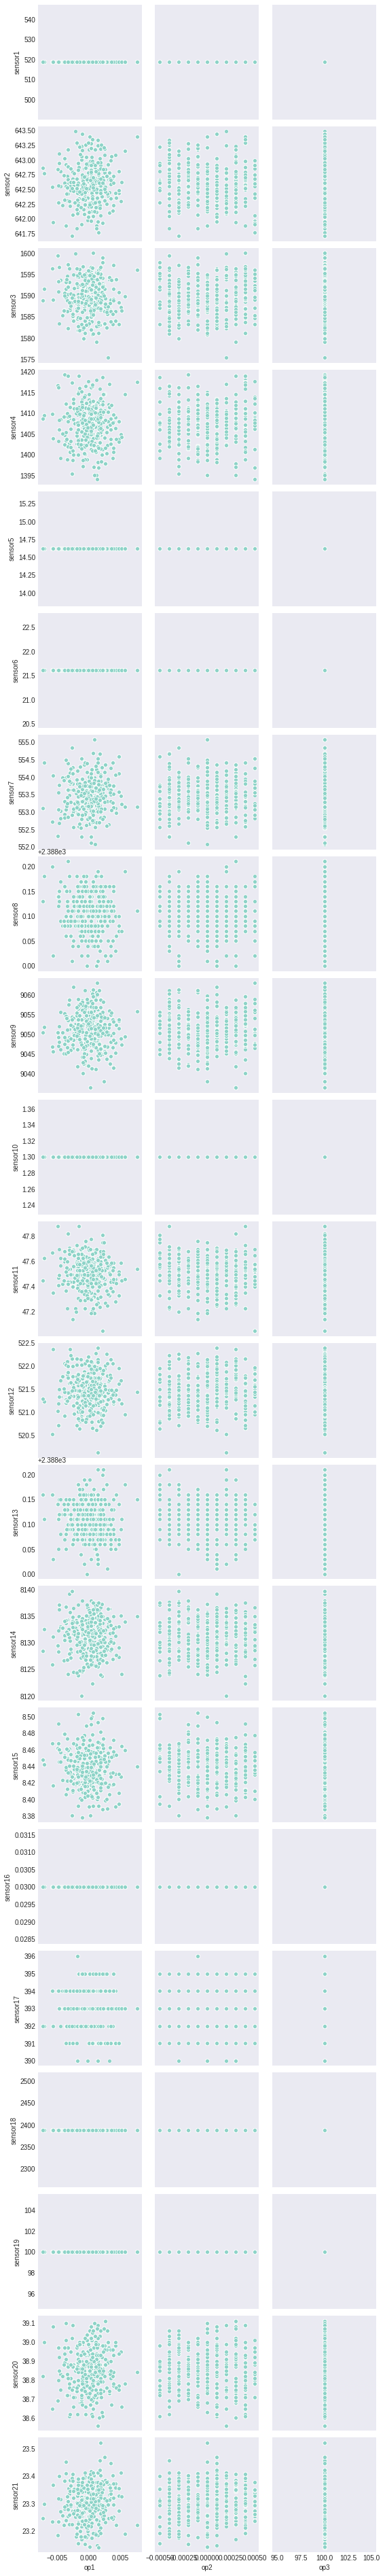

In [ ]:
plt.style.use('seaborn-dark')
ax=sb.pairplot(test.query("cycle"),x_vars=op_set,y_vars=sensor,palette="husl")

In [ ]:
df_train.label.unique()

array([0, 1])

           op1   op2  op3  sensor1  ...  sensor18  sensor19  sensor20  sensor21
op1       1.00  0.01  NaN     -0.0  ...       NaN       NaN     -0.01     -0.01
op2       0.01  1.00  NaN     -0.0  ...       NaN       NaN     -0.01     -0.01
op3        NaN   NaN  NaN      NaN  ...       NaN       NaN       NaN       NaN
sensor1  -0.00 -0.00  NaN      1.0  ...       NaN       NaN     -0.00     -0.00
sensor2   0.01  0.01  NaN      0.0  ...       NaN       NaN     -0.66     -0.67
sensor3  -0.01  0.01  NaN     -0.0  ...       NaN       NaN     -0.63     -0.63
sensor4   0.01  0.01  NaN      0.0  ...       NaN       NaN     -0.75     -0.75
sensor5  -0.00  0.00  NaN      1.0  ...       NaN       NaN     -0.00     -0.00
sensor6  -0.00  0.01  NaN      0.0  ...       NaN       NaN     -0.14     -0.14
sensor7  -0.01 -0.02  NaN      0.0  ...       NaN       NaN      0.74      0.74
sensor8  -0.00  0.01  NaN     -0.0  ...       NaN       NaN     -0.69     -0.69
sensor9  -0.00 -0.01  NaN      0.0  ... 

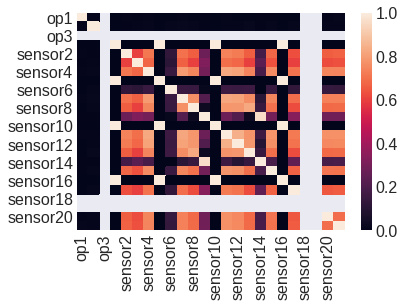

In [ ]:
corr_matrix=df_train.iloc[:,range(2,26)].corr(method='pearson')
print(round(corr_matrix,2))
 #taking the absolute to keep the magnitude of the probabilty ("-" or "+")
corr_matrix=abs(corr_matrix)
print("\n\n ***considering only the magnitude of the probabilites and not the sign, the heat map is given below: ")
sb.heatmap(corr_matrix)

In [ ]:
df_test.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,remaining_cycle,label
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,142,0
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,141,0
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,140,0
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,139,0
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,138,0


In [ ]:
df_test.columns

Index(['id', 'cycle', 'op1', 'op2', 'op3', 'sensor1', 'sensor2', 'sensor3',
       'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9',
       'sensor10', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15',
       'sensor16', 'sensor17', 'sensor18', 'sensor19', 'sensor20', 'sensor21',
       'remaining_cycle', 'label'],
      dtype='object')

# Let's delete the useless variables

In [ ]:
df_test.drop(["id","cycle","op3","sensor1","sensor5","sensor6","sensor10","sensor16","sensor18","sensor19"],axis=1,inplace=True)

In [ ]:
df_test.label.unique()

array([0, 1])

In [ ]:
x=df_train.drop(["id","cycle","op3","sensor1","sensor5","sensor6","sensor10","sensor16","sensor18","sensor19","remaining_cycle","label"],axis=1)
y=df_train.label
print('x shape : ',x.shape)
print('y shape : ',y.shape)

x shape :  (20631, 16)
y shape :  (20631,)


# Create Model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=3)
# gc.collect()  
print('X_train shape : ',X_train.shape)
print('X_test shape : ',X_test.shape)
print('y_train shape : ',y_train.shape)
print('y_test shape : ',y_test.shape)

X_train shape :  (16504, 16)
X_test shape :  (4127, 16)
y_train shape :  (16504,)
y_test shape :  (4127,)


In [ ]:
import lightgbm as lgb
lgb_clss = lgb.LGBMClassifier(learning_rate=0.01,n_estimators=5000,num_leaves=100,objective='binary', metrics='auc',random_state=50,n_jobs=-1)
lgb_clss.fit(X_train, y_train)
lgb_clss.score(X_test, y_test)
preds2 = lgb_clss.predict(X_test)
print('Acc Score: ',accuracy_score(y_test, preds2))
print('Roc Auc Score: ',roc_auc_score(y_test, preds2))
print('Precision Score: ',precision_score(y_test, preds2))
print('Recall Score: ',recall_score(y_test, preds2))
print('f1 score: ',f1_score(y_test, preds2,'binary'))

NameError: ignored

In [ ]:
#test score
lgb_clss.score(df_test.drop(['remaining_cycle','label'],axis=1),df_test.iloc[:,-1])
preds3 = lgb_clss.predict(df_test.drop(['remaining_cycle','label'],axis=1))
print('Acc Score: ',accuracy_score(df_test.iloc[:,-1], preds3))
print('Roc Auc Score: ',roc_auc_score(df_test.iloc[:,-1], preds3))
print('Precision Score: ',precision_score(df_test.iloc[:,-1], preds3))
print('Recall Score: ',recall_score(df_test.iloc[:,-1], preds3))
print('f1 score: ',f1_score(df_test.iloc[:,-1], preds3,'binary'))

Acc Score:  0.9861789859499084
Roc Auc Score:  0.8080864668325449
Precision Score:  0.789272030651341
Recall Score:  0.6204819277108434
f1 score:  0.6947723440134906


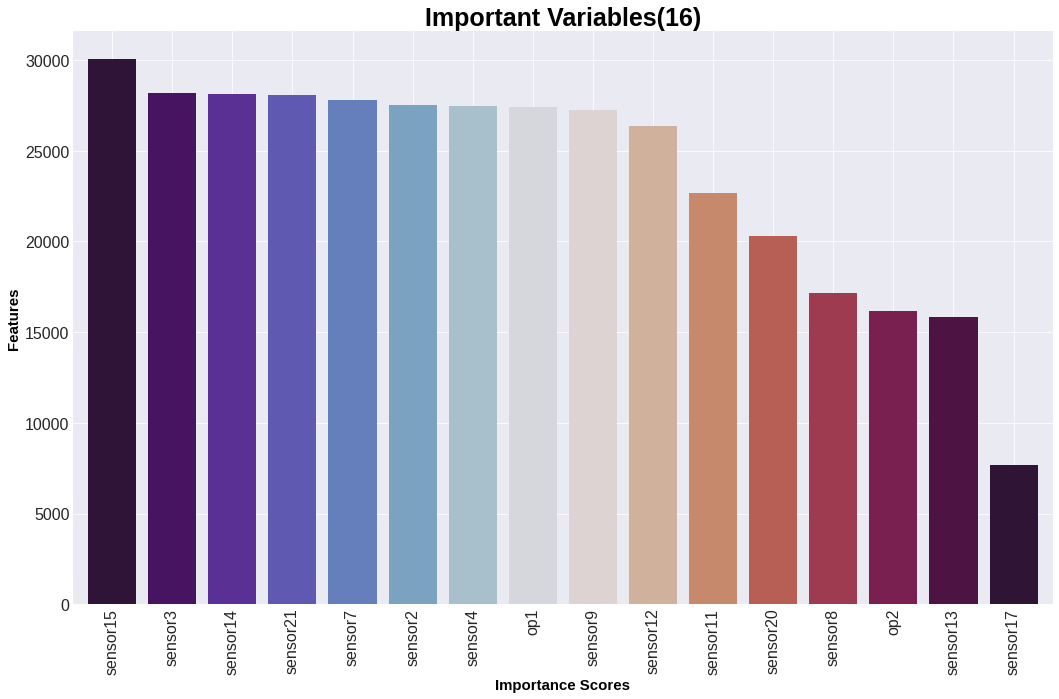

In [ ]:
colors = [plt.cm.twilight_shifted(i/float(len(x.columns)-1)) for i in range(len(x.columns))]
columns_X_train=x.columns.tolist()
X_train=pd.DataFrame(X_train)
X_train.set_axis(columns_X_train, axis=1, inplace=True)
feat_importances = pd.Series(lgb_clss.feature_importances_, index=X_train.columns)
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 16})
plt.title('Important Variables(16)',color='black',fontweight='bold',size=25)
feat_importances.nlargest(16).plot(kind='bar', color=colors, width=0.8, align='center')
plt.ylabel('Features',color='black',fontweight='bold',size=15)
plt.xlabel('Importance Scores',color='black',fontweight='bold',size=15)
plt.tight_layout()
plt.grid(True)
plt.show()

**Alternative - Simple plot_importance**

Text(0, 0.5, 'Variables')

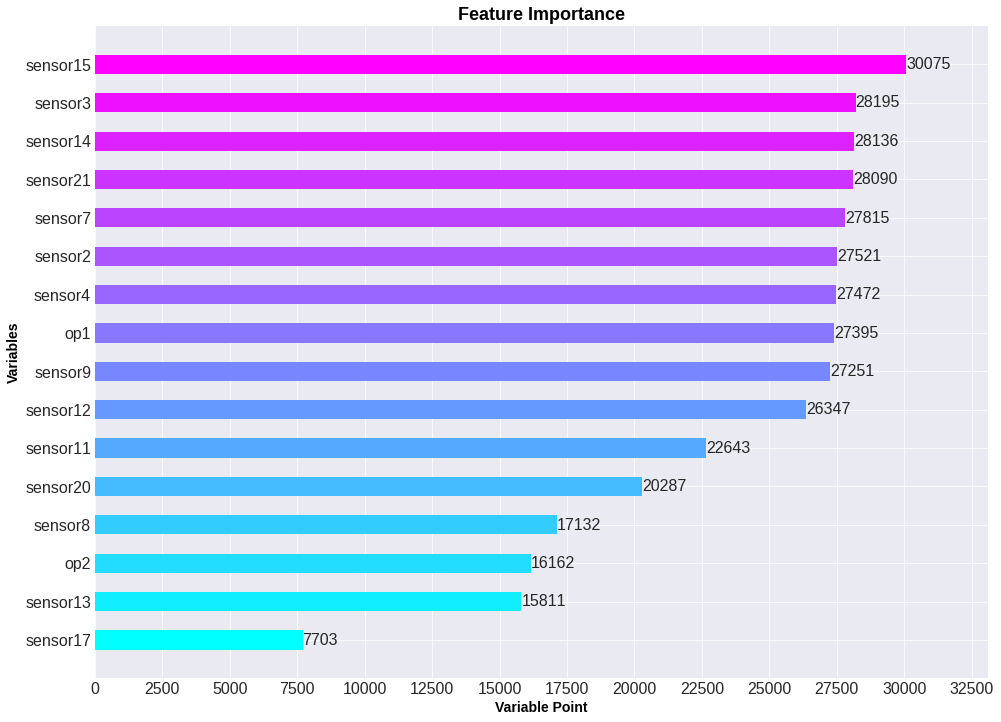

In [ ]:
colors = [plt.cm.cool(i/float(len(x.columns)-1)) for i in range(len(x.columns))]
ax = lgb.plot_importance(lgb_clss, max_num_features=16,figsize=(16,12),height=0.5,color=colors)
ax.set_title('Feature Importance',color='black',fontweight='bold',size=18)
ax.set_xlabel('Variable Point',color='black',fontweight='bold',size=14)
ax.set_xticks(np.arange(0,32501,2500))
ax.set_ylabel('Variables',color='black',fontweight='bold',size=14)

In [ ]:
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV
stf_kf=StratifiedKFold(n_splits=5)
import xgboost as xgb
xgb_classifier=xgb.XGBClassifier(n_estimators=725,n_jobs=-1)
params={
         'learning_rate': np.arange(0.01, 0.11, 0.025),
         'max_depth': np.arange(1, 10, 1),
         'min_child_weight': np.arange(1, 10, 1), 
         'subsample': np.arange( 0.7, 1, 0.05), 
         'gamma': np.arange(0.5, 1, 0.1), 
         'colsample_bytree': np.arange( 0.1, 1, 0.05), 
         'scale_pos_weight': np.arange( 20, 200, 10)}
rs_cv_classifier=RandomizedSearchCV(xgb_classifier,param_distributions=params,cv=stf_kf,n_jobs=-1)
rs_cv_classifier.fit(X_train,y_train)
y_pred=rs_cv_classifier.predict(X_test)
print("Best Parameter: \n",rs_cv_classifier.best_params_)
print("XGBClassifier Acc Score: ",accuracy_score(y_pred,y_test))

Best Parameter: 
 {'subsample': 1.0000000000000002, 'scale_pos_weight': 40, 'min_child_weight': 4, 'max_depth': 9, 'learning_rate': 0.060000000000000005, 'gamma': 0.6, 'colsample_bytree': 0.3500000000000001}
XGBClassifier Acc Score:  0.9559001696147322


In [ ]:
df_test_pred = rs_cv_classifier.predict(df_test.drop(['remaining_cycle','label'],axis=1))
cm=confusion_matrix(df_test.iloc[:,-1], df_test_pred, labels=None, sample_weight=None)

In [ ]:
print("Test Accuracy Score: ", accuracy_score(df_test.iloc[:,-1],df_test_pred))

Test Accuracy Score:  0.9825901038485033


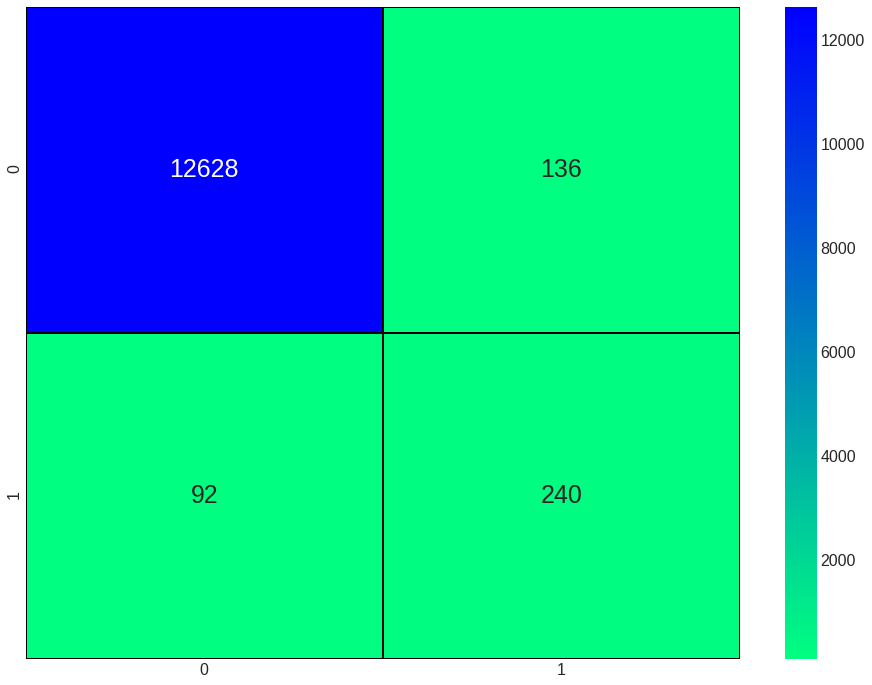

In [ ]:
plt.figure(figsize=(16,12))
sb.heatmap(cm,annot=True,annot_kws={"size": 25},linewidths=0.7,linecolor="black",cmap="winter_r",fmt="d")

In [ ]:
# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
knn_predictions = knn.predict(X_test) 

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print("Confusion Matrix: \n", 
        confusion_matrix(y_test, knn_predictions))  
print ("\nAccuracy : ", 
    accuracy_score(y_test,knn_predictions)*100) 
      
print("\nReport : \n", 
    classification_report(y_test, knn_predictions))

Confusion Matrix: 
 [[3391  122]
 [ 146  468]]

Accuracy :  93.50617882238915

Report : 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      3513
           1       0.79      0.76      0.78       614

    accuracy                           0.94      4127
   macro avg       0.88      0.86      0.87      4127
weighted avg       0.93      0.94      0.93      4127



In [ ]:
#test data
knn_pred= knn.predict(df_test.drop(['remaining_cycle','label'],axis=1))

print("Confusion Matrix: \n", 
        confusion_matrix(df_test.iloc[:,-1], knn_pred))  
print ("\nAccuracy : ", 
    accuracy_score(df_test.iloc[:,-1],knn_pred)*100) 
      
print("\nReport : \n", 
    classification_report(df_test.iloc[:,-1], knn_pred))

Confusion Matrix: 
 [[12646   118]
 [  150   182]]

Accuracy :  97.95357361026268

Report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     12764
           1       0.61      0.55      0.58       332

    accuracy                           0.98     13096
   macro avg       0.80      0.77      0.78     13096
weighted avg       0.98      0.98      0.98     13096



In [ ]:
# Logistic Regression: Training and Predicting the Model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = logmodel.predict(X_test)
print("Confusion Matrix: \n", 
        confusion_matrix(y_test, predictions))  
print ("\nAccuracy : ", 
    accuracy_score(y_test,predictions)*100) 
      
print("\nReport : \n", 
    classification_report(y_test, predictions))

Confusion Matrix: 
 [[3429   84]
 [ 124  490]]

Accuracy :  94.96001938454083

Report : 
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      3513
           1       0.85      0.80      0.82       614

    accuracy                           0.95      4127
   macro avg       0.91      0.89      0.90      4127
weighted avg       0.95      0.95      0.95      4127



In [ ]:
#Model Evaluation on test Data
pred = logmodel.predict(df_test.drop(['remaining_cycle','label'],axis=1))
print("Confusion Matrix: \n", 
        confusion_matrix(df_test.iloc[:,-1], pred))  
print ("\nAccuracy : ", 
    accuracy_score(df_test.iloc[:,-1],pred)*100) 
      
print("\nReport : \n", 
    classification_report(df_test.iloc[:,-1], pred))

Confusion Matrix: 
 [[12711    53]
 [  149   183]]

Accuracy :  98.45754428833231

Report : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     12764
           1       0.78      0.55      0.64       332

    accuracy                           0.98     13096
   macro avg       0.88      0.77      0.82     13096
weighted avg       0.98      0.98      0.98     13096



In [ ]:
# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 

##CART decision Tree
dtree_model_cart = DecisionTreeClassifier(criterion="gini",max_depth =2).fit(X_train, y_train) 
dtree_predictions = dtree_model_cart.predict(X_test)
print("Confusion Matrix: \n", 
        confusion_matrix(y_test, dtree_predictions))  
print ("\nAccuracy : ", 
    accuracy_score(y_test,dtree_predictions)*100) 
      
print("\nReport : \n", 
    classification_report(y_test, dtree_predictions))


Confusion Matrix: 
 [[3436   77]
 [ 155  459]]

Accuracy :  94.37848315968016

Report : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      3513
           1       0.86      0.75      0.80       614

    accuracy                           0.94      4127
   macro avg       0.91      0.86      0.88      4127
weighted avg       0.94      0.94      0.94      4127



In [ ]:
##ID3 decision Tree
dtree_model_id3 = DecisionTreeClassifier(criterion="entropy",max_depth =2).fit(X_train, y_train) 
dtree_predictions2 = dtree_model_id3.predict(X_test)
print("Confusion Matrix: \n", 
        confusion_matrix(y_test, dtree_predictions))  
print ("\nAccuracy : ", 
    accuracy_score(y_test,dtree_predictions)*100) 
      
print("\nReport : \n", 
    classification_report(y_test, dtree_predictions))

Confusion Matrix: 
 [[3436   77]
 [ 155  459]]

Accuracy :  94.37848315968016

Report : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      3513
           1       0.86      0.75      0.80       614

    accuracy                           0.94      4127
   macro avg       0.91      0.86      0.88      4127
weighted avg       0.94      0.94      0.94      4127



In [ ]:
##test data CART
dtree_pred = dtree_model_cart.predict(df_test.drop(['remaining_cycle','label'],axis=1))
print("Confusion Matrix: \n", 
        confusion_matrix(df_test.iloc[:,-1], pred))  
print ("\nAccuracy : ", 
    accuracy_score(df_test.iloc[:,-1],pred)*100) 
      
print("\nReport : \n", 
    classification_report(df_test.iloc[:,-1], pred))

Confusion Matrix: 
 [[12711    53]
 [  149   183]]

Accuracy :  98.45754428833231

Report : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     12764
           1       0.78      0.55      0.64       332

    accuracy                           0.98     13096
   macro avg       0.88      0.77      0.82     13096
weighted avg       0.98      0.98      0.98     13096



In [ ]:
##test data ID3
dtree_pred = dtree_model_id3.predict(df_test.drop(['remaining_cycle','label'],axis=1))
print("Confusion Matrix: \n", 
        confusion_matrix(df_test.iloc[:,-1], pred))  
print ("\nAccuracy : ", 
    accuracy_score(df_test.iloc[:,-1],pred)*100) 
      
print("\nReport : \n", 
    classification_report(df_test.iloc[:,-1], pred))

Confusion Matrix: 
 [[12711    53]
 [  149   183]]

Accuracy :  98.45754428833231

Report : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     12764
           1       0.78      0.55      0.64       332

    accuracy                           0.98     13096
   macro avg       0.88      0.77      0.82     13096
weighted avg       0.98      0.98      0.98     13096



In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predictions = random_forest.predict(X_test)
print("Confusion Matrix: \n", 
        confusion_matrix(y_test, predictions))  
print ("\nAccuracy : ", 
    accuracy_score(y_test,predictions)*100) 
      
print("\nReport : \n", 
    classification_report(y_test, predictions))

Confusion Matrix: 
 [[3447   66]
 [  99  515]]

Accuracy :  96.00193845408288

Report : 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      3513
           1       0.89      0.84      0.86       614

    accuracy                           0.96      4127
   macro avg       0.93      0.91      0.92      4127
weighted avg       0.96      0.96      0.96      4127



In [ ]:
#Model Evaluation on test Data
pred = random_forest.predict(df_test.drop(['remaining_cycle','label'],axis=1))
print("Confusion Matrix: \n", 
        confusion_matrix(df_test.iloc[:,-1], pred))  
print ("\nAccuracy : ", 
    accuracy_score(df_test.iloc[:,-1],pred)*100) 
      
print("\nReport : \n", 
    classification_report(df_test.iloc[:,-1], pred))

Confusion Matrix: 
 [[12715    49]
 [  131   201]]

Accuracy :  98.62553451435552

Report : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     12764
           1       0.80      0.61      0.69       332

    accuracy                           0.99     13096
   macro avg       0.90      0.80      0.84     13096
weighted avg       0.99      0.99      0.99     13096



In [ ]:
#SVM
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predictions = svm_model.predict(X_test)
print("Confusion Matrix: \n", 
        confusion_matrix(y_test, predictions))  
print ("\nAccuracy : ", 
    accuracy_score(y_test,predictions)*100) 
      
print("\nReport : \n", 
    classification_report(y_test, predictions))

Confusion Matrix: 
 [[3513    0]
 [ 614    0]]

Accuracy :  85.1223649139811

Report : 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      3513
           1       0.00      0.00      0.00       614

    accuracy                           0.85      4127
   macro avg       0.43      0.50      0.46      4127
weighted avg       0.72      0.85      0.78      4127



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Model Evaluation on test Data
pred = svm_model.predict(df_test.drop(['remaining_cycle','label'],axis=1))
print("Confusion Matrix: \n", 
        confusion_matrix(df_test.iloc[:,-1], pred))  
print ("\nAccuracy : ", 
    accuracy_score(df_test.iloc[:,-1],pred)*100) 
      
print("\nReport : \n", 
    classification_report(df_test.iloc[:,-1], pred))

Confusion Matrix: 
 [[12764     0]
 [  332     0]]

Accuracy :  97.46487477092242

Report : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     12764
           1       0.00      0.00      0.00       332

    accuracy                           0.97     13096
   macro avg       0.49      0.50      0.49     13096
weighted avg       0.95      0.97      0.96     13096



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
